In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt

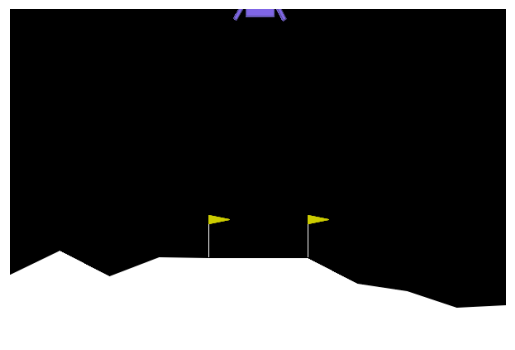

(400, 600, 3)
{'image': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [2, 5, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]]], dtype=uint8), 'direction': 0, '

In [3]:
env = gym.make("LunarLander-v3", render_mode = "rgb_array")
env.reset()
frame = env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

env.close()
print(frame.shape)
print(state)

0
False


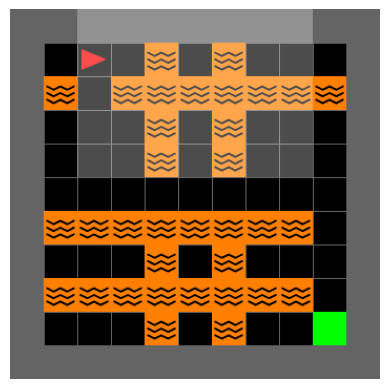

In [155]:
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper


env = gym.make("MiniGrid-LavaCrossingS11N5-v0", render_mode = 'rgb_array')

state, _ = env.reset()
next_state, reward, done, info, _ = env.step(2)
print(reward)
print(info)
frame = env.render()
plt.imshow(frame)
plt.axis('off') 
plt.show()

In [162]:
import gymnasium as gym
from minigrid.wrappers import FlatObsWrapper, RGBImgPartialObsWrapper, ImgObsWrapper

env = gym.make('MiniGrid-Empty-8x8-v0')
env = FlatObsWrapper(env)
# env = RGBImgPartialObsWrapper(env) # Get pixel observations
# env = ImgObsWrapper(env) # Get rid of the 'mission' field
obs, _ = env.reset() # This now produces an RGB tensor only
print(obs)


[2 5 0 ... 0 0 0]
